# Simulation of Projectile Motion in 2D - no air resistance.

In [114]:
import numpy as np

# Define the initial conditions of the motion
v0 = 40.0
theta = 45.0*np.pi/180.0

y0 = 0.001
v0y = v0*np.sin(theta)
x0 = 0.0
v0x = v0*np.cos(theta)
ay = -9.80524
ax = 0.0

In [115]:
# Define the time interval, dt, for the simulation
dt = 0.001

y = []
x = []
t = []
vy = []
vx = []

y.append(y0)
x.append(x0)
vy.append(v0y)
vx.append(v0x)
t.append(0.0)

y_current = y[0]
x_current = x[0]
vy_current = vy[0]
vx_current = vx[0]
t_current = t[0]

# Theory:
# v = v0 + a_yt
# y = y0 + v0y*t + 1/2*a_y*t**2
# x = x0 + v0x*t + 1/2*a_x*t**2

n=1
while (y_current > 0):
    y_current += vy_current*dt
    x_current += vx_current*dt
    vy_current += ay*dt
    vx_current += ax*dt
    t_current += dt
    y.append(y_current)
    x.append(x_current)
    vy.append(vy_current)
    vx.append(vx_current)
    t.append(t_current)
    n = n + 1


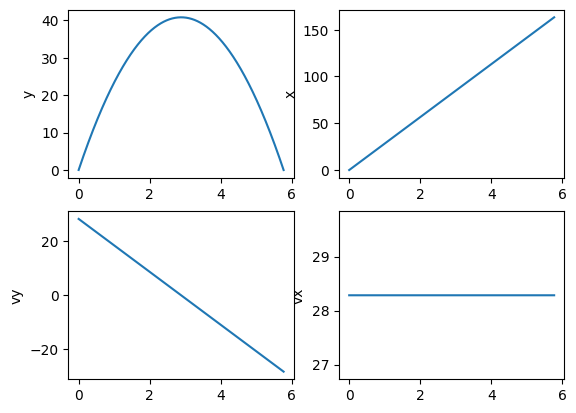

In [116]:
import matplotlib.pyplot as plt

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=2, ncols=2) 

# On the first axis, plot the y value 
axs[0][0].plot(t,y) 
axs[0][0].set_ylabel('y') 

# On the second axis, plot the vy value 
axs[1][0].plot(t,vy) 
axs[1][0].set_ylabel('vy')

# On the third axis, plot the x value 
axs[0][1].plot(t,x) 
axs[0][1].set_ylabel('x') 

# On the fourth axis, plot the vx value 
axs[1][1].plot(t,vx) 
axs[1][1].set_ylabel('vx')

plt.show()

In [120]:
from matplotlib import animation
from IPython.display import HTML
import numpy as np

FPS=30
plt.style.use('default')

x = np.array(x)
y = np.array(y)
xm = x.min()
xp = x.max()+10
ym = y.min()
yp = y.max()+10

# Set up the figure
fig = plt.figure(figsize=(10, 5), dpi=60)

if (xp>yp):
    ax = plt.axes(xlim=(xm, xp), ylim=(xm/2, xp/2))
else:
    ax = plt.axes(xlim=(ym, yp), ylim=(ym/2, yp/2))
ax.set_aspect('equal')
ax.axis('on')

# Define the different elements in the animation
ball = plt.Circle((x[0], y[0]), xp/150.0, fc="black")
ax.add_patch(ball)

# Calculates the number of frames
framesNum = int(FPS*t[-1])+1

# Animation function. This is called sequentially.
def animate(j):
    i = j*int(n/framesNum)
    ball.center = (x[i], y[i])

# Create animation
anim = animation.FuncAnimation(fig, animate, frames=framesNum, interval=1000/FPS, repeat=False)
plt.close(anim._fig)

# Display the animation
HTML(anim.to_html5_video())